# Data Visualization and Analysis Mini Project - 911 calls

We will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

____
## Data and Setup

Importing numpy and pandas.

In [1]:
import numpy as np
import pandas as pd

Importing visualization libraries.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_context(context= 'notebook', font_scale= 1.1)
%matplotlib inline

Reading the csv file as a dataframe, df.

In [3]:
df = pd.read_csv('911.csv')

Checking the info() of df.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Checking the head() of df.

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


____
## Some Observations

The top 5 zipcodes for 911 calls.

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top 5 townships (twp) for 911 calls.

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

No. of unique title codes are there.

In [8]:
df['title'].nunique()

110

In the titles column there are "Reasons/Departments" specified before the title code. 
These are EMS, Fire, and Traffic. 
Creating a new column called "Reason" that contains this string value. 

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [9]:
df['Reasons'] = df['title'].apply(lambda title : title.split(':')[0])

The most common Reason for a 911 call based off of this new column.

In [10]:
df['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

**Plotting a countplot of 911 calls by Reason.**

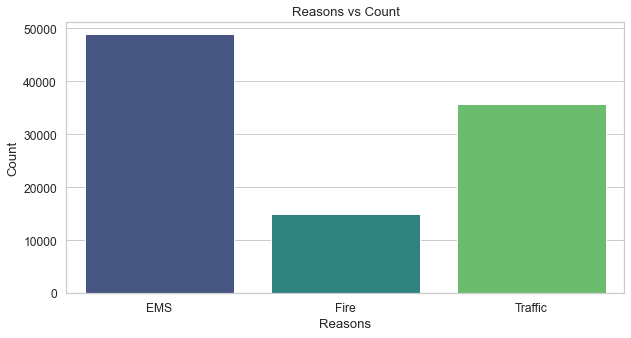

In [11]:
fig = plt.figure(figsize = (10,5))
plot = sns.countplot(x = df['Reasons'], palette = 'viridis')
plot.set(xlabel='Reasons', ylabel='Count', title='Reasons vs Count', )
plt.show()

Using the [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the timestamp column from strings to DateTime objects

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Creating 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column.

In [13]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)
df['Month'] = df['timeStamp'].apply(lambda time : time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

**Plotting a countplot of 911 calls by Day of Week.**

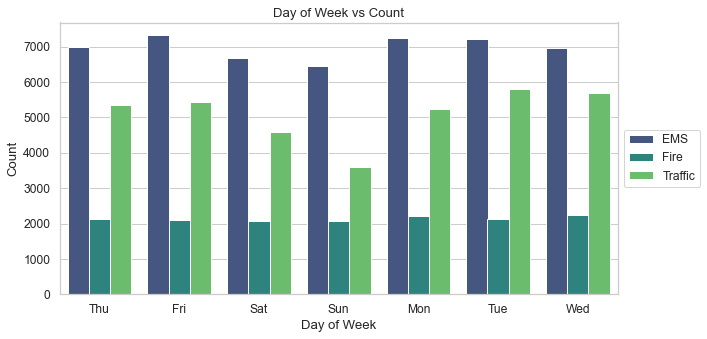

In [14]:
fig = plt.figure(figsize = (10,5))
plot = sns.countplot(x = df['Day of Week'], palette = 'viridis', hue = df['Reasons'])
plot.set(xlabel='Day of Week', ylabel='Count', title='Day of Week vs Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

**Plotting a countplot of 911 calls by Month.**

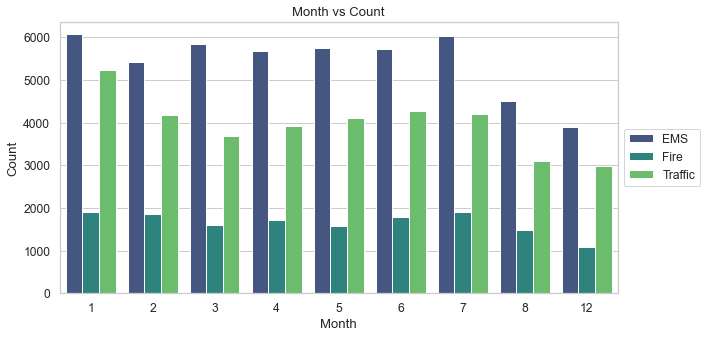

In [15]:
fig = plt.figure(figsize = (10,5))
plot = sns.countplot(x = df['Month'], palette = 'viridis', hue = df['Reasons'])
plot.set(xlabel='Month', ylabel='Count', title='Month vs Count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

We notice that the plot is missing some Months. We can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

Creating a gropuby object called byMonth, and using the count() method for aggregation.

In [16]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**Plotting a lineplot of 911 calls by Month.**

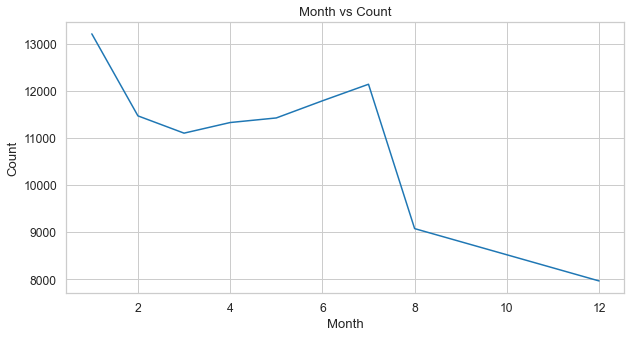

In [17]:
fig = plt.figure(figsize = (10,5))
plot = sns.lineplot(x = 'Month',y = 'e', data = byMonth.reset_index(), palette = 'viridis')
plot.set(xlabel='Month', ylabel='Count', title='Month vs Count')
plt.show()

**Plotting a lineplot of 911 calls by Month to create a linear fit.**

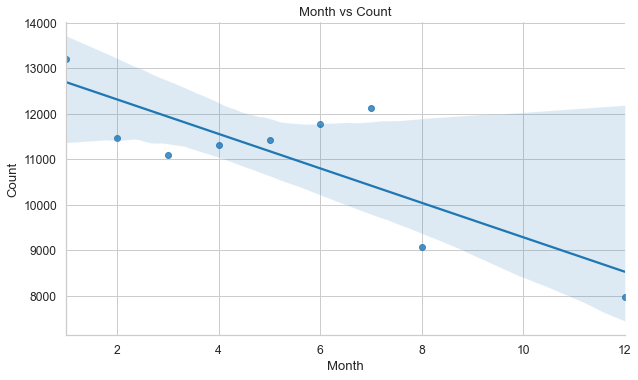

In [18]:
plot = sns.lmplot(x = 'Month', y = 'e', data = byMonth.reset_index(), palette = 'viridis', height= 5, aspect= 1.75, )
plot.set(xlabel='Month', ylabel='Count', title='Month vs Count')
plt.show()

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [19]:
df['Date'] = df['timeStamp'].apply(lambda time : time.date())

**Plotting a lineplot of 911 calls by Date.**

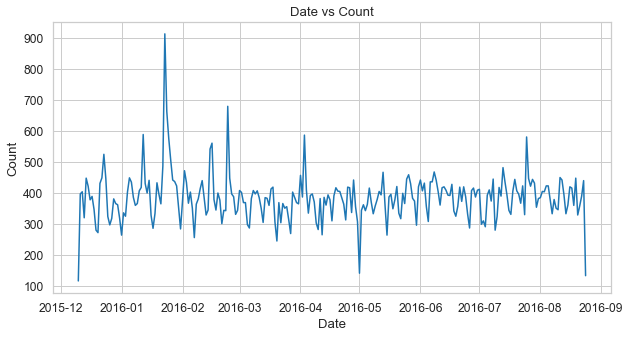

In [20]:
fig = plt.figure(figsize = (10,5))
plot = sns.lineplot(x = 'Date', y = 'e', data = df.groupby('Date').count() , palette = 'viridis')
plot.set(xlabel='Date', ylabel='Count', title='Date vs Count')
plt.show()

**Plotting 3 separate lineplots with each plot representing a Reason for the 911 call**

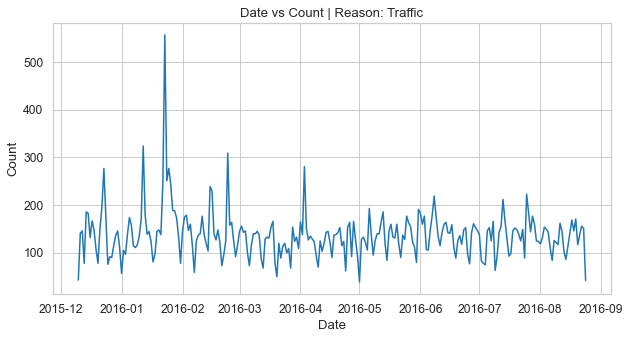

In [21]:
fig = plt.figure(figsize = (10,5))
plot = sns.lineplot(x = 'Date', y = 'e', data = df[df['Reasons'] == 'Traffic'].groupby('Date').count() , palette = 'viridis')
plot.set(xlabel='Date', ylabel='Count', title='Date vs Count | Reason: Traffic')
plt.show()

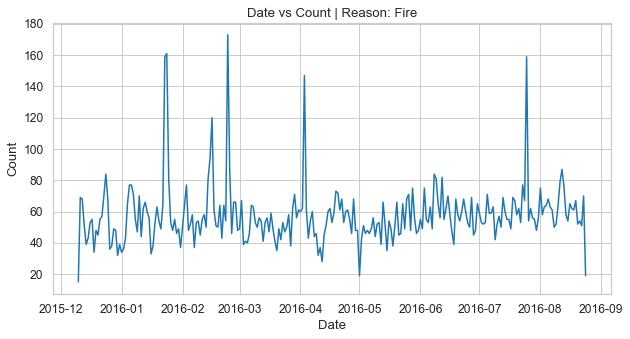

In [22]:
fig = plt.figure(figsize = (10,5))
plot = sns.lineplot(x = 'Date', y = 'e', data = df[df['Reasons'] == 'Fire'].groupby('Date').count() , palette = 'viridis')
plot.set(xlabel='Date', ylabel='Count', title='Date vs Count | Reason: Fire')
plt.show()

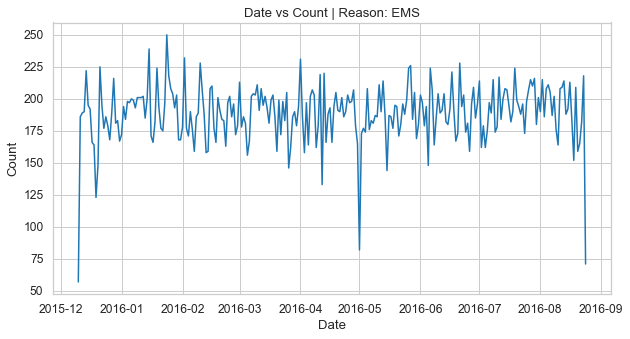

In [23]:
fig = plt.figure(figsize = (10,5))
plot = sns.lineplot(x = 'Date', y = 'e', data = df[df['Reasons'] == 'EMS'].groupby('Date').count() , palette = 'viridis')
plot.set(xlabel='Date', ylabel='Count', title='Date vs Count | Reason: EMS')
plt.show()

We now restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [24]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Plotting a heatmap for Hour vs Day of Week**

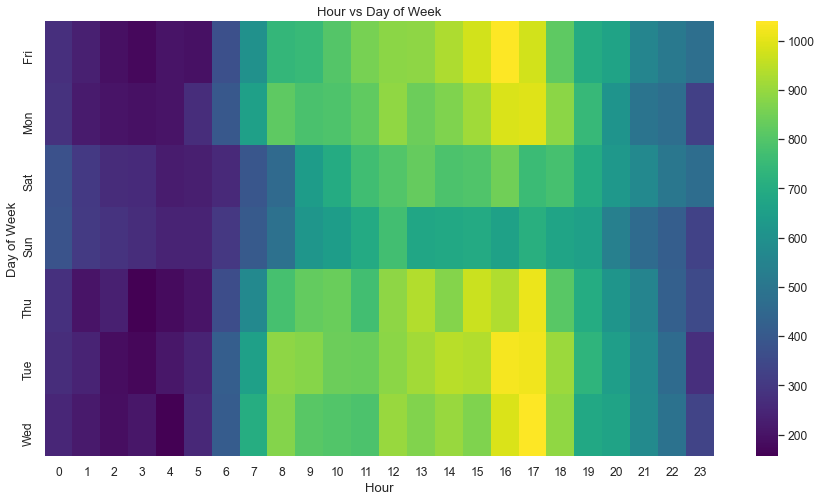

In [25]:
fig = plt.figure(figsize = (15,8))
plot = sns.heatmap(dayHour, cmap = 'viridis')
plot.set(xlabel='Hour', ylabel='Day of Week', title='Hour vs Day of Week')
plt.show()

**Plotting a clustermap for Hour vs Day of Week**

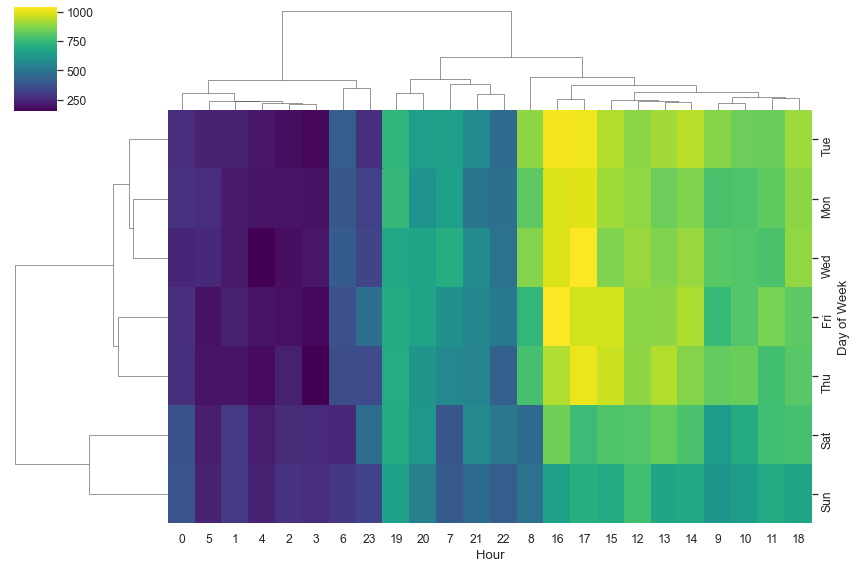

In [26]:
plot = sns.clustermap(dayHour, cmap = 'viridis', figsize=(12, 8))
plt.show()

Repeating these same plots and operations, for a DataFrame that shows the Month as the column.

In [27]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Plotting a heatmap for Month vs Day of Week**

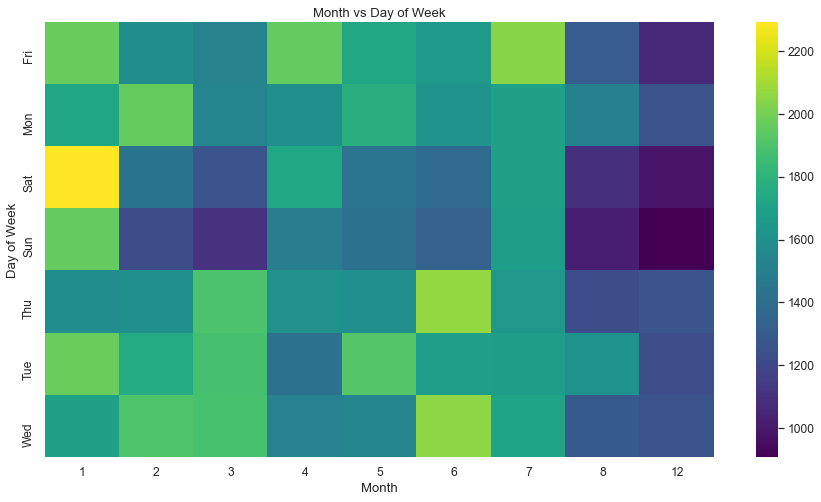

In [28]:
fig = plt.figure(figsize = (15,8))
plot = sns.heatmap(dayMonth, cmap = 'viridis')
plot.set(xlabel='Month', ylabel='Day of Week', title='Month vs Day of Week')
plt.show()

**Plotting a clustermap for Month vs Day of Week**

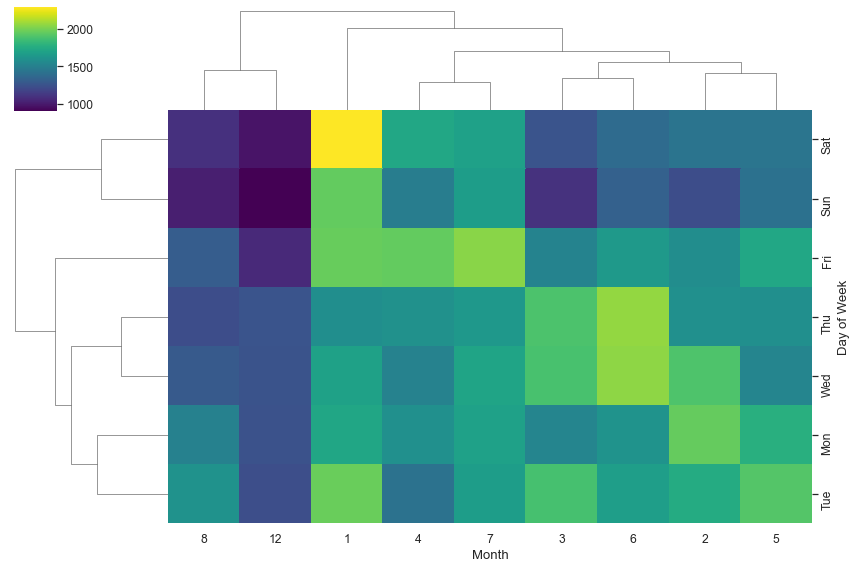

In [29]:
plot = sns.clustermap(dayMonth, cmap = 'viridis', figsize=(12, 8))
plt.show()